# 6. Quiz

## 어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다. 현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인원의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오.

주의) 사전 작업으로 아래 코드 셀을 먼저 실행하시오

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1) QuizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원(total), 식수 인원(reception)을 각각의 변수로 저장하시오.

In [31]:
dataset = pd.read_csv('QuizData.csv') #total: 결혼식 총 참석자 수, reception: 결혼식 참석 후 식사를 한 참석자 수

dataset.head() #상위 5개 출력

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92


In [33]:
total = dataset.iloc[:,:-1].values #결혼식 참석 인원
reception = dataset.iloc[:,-1].values # 식수 인원 reception

In [35]:
total,reception

(array([[118],
        [253],
        [320],
        [ 94],
        [155],
        [188],
        [201],
        [338],
        [186],
        [183],
        [223],
        [392],
        [ 86],
        [112],
        [129],
        [223],
        [288],
        [262],
        [143],
        [179]], dtype=int64),
 array([ 62, 148, 201,  80,  92, 131, 147, 187, 124, 152, 143, 199,  58,
         68,  76, 149, 152, 183,  88, 101], dtype=int64))

## 2) 전체 데이터를 훈련 세트와 테스트 세트로 분리하시오. 이 때 비율은 75 : 25 로 합니다.

(단, random_state = 0 으로 설정)

In [37]:
from sklearn.model_selection import train_test_split
T_train,T_test,r_train,r_test = train_test_split(total,reception,test_size = 0.25,random_state = 0) #훈련 75, 테스트 25로 분리

In [41]:
#T_train, len(T_train), T_test, len(T_test) #75:25 비율 확인 15:5
r_train, len(r_train), r_test, len(r_test)

(array([183, 147,  68,  92, 201, 131,  76, 152, 187, 152, 199,  80,  62,
        149,  58], dtype=int64),
 15,
 array([ 88, 148, 101, 124, 143], dtype=int64),
 5)

## 3) 훈련 세트를 이용하여 단순 선형 회귀 (Simple Linear Regression) 모델을 생성하시오.

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [45]:
reg.fit(T_train,r_train) #훈련 세트로 학습

LinearRegression()

## 4) 데이터 시각화 (훈련 세트) 코드를 작성하시오.

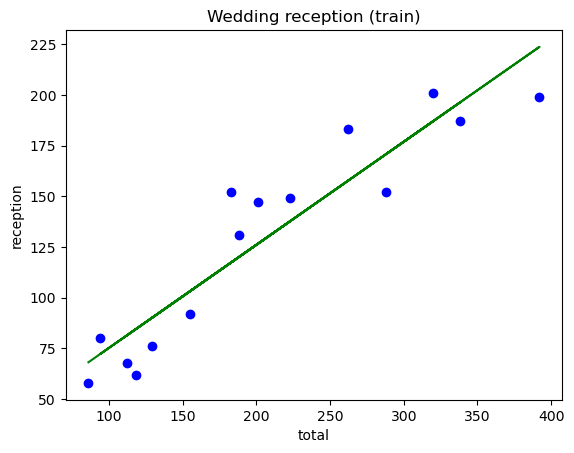

In [47]:
plt.scatter(T_train,r_train, color ='blue') #산점도 계산
plt.plot(T_train,reg.predict(T_train), color = 'green') #선 그래프
plt.title("Wedding reception (train)") # 제목
plt.xlabel('total') # X 축 이름
plt.ylabel('reception') # y 축 이름
plt.show()

## 5) 데이터 시각화 (테스트 세트) 코드를 작성하시오.

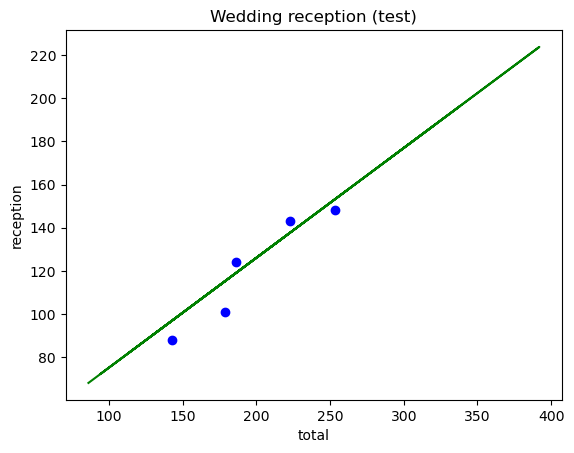

In [49]:
plt.scatter(T_test,r_test, color ='blue') #산점도 계산
plt.plot(T_train,reg.predict(T_train), color = 'green') #선 그래프
plt.title("Wedding reception (test)") # 제목
plt.xlabel('total') # X 축 이름
plt.ylabel('reception') # y 축 이름
plt.show()

## 6) 훈련 세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오.

In [51]:
reg.score(T_train,r_train) #훈련 세트를 통한 모델 평가

0.8707088403321211

In [53]:
reg.score(T_test,r_test) #테스트 세트를 통한 모델 평가

0.8634953212566615

## 7) 결혼식 참석 인원이 300명일 때 예상되는 식수 인원을 구하시오.

In [69]:
participants = 300  # 참석인원
predicted_guests = np.ceil(reg.predict([[participants]])).astype(int)
print(f"결혼식 참석 인원 {participants}일 때 예상되는 식수 인원은 {predicted_guests[0]}명입니다.")


결혼식 참석 인원 300일 때 예상되는 식수 인원은 177명입니다.
